## Упражнение 2.2

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Создадим пилообразный сигнал, используя класс SawtoothSignal. Частота - 200 Гц

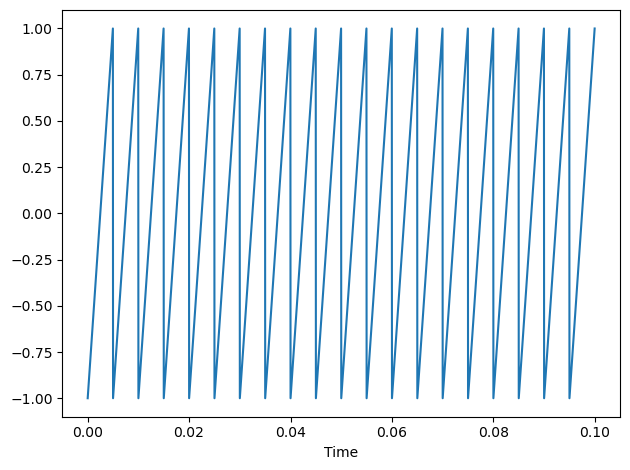

In [2]:
from thinkdsp import SawtoothSignal, SquareSignal, TriangleSignal, decorate
sawtooth = SawtoothSignal(200)
segment = sawtooth.make_wave(duration = 0.1, framerate = 30000)
segment.plot()
decorate(xlabel = "Time")

Получим аудиозапись данного сигнала

In [4]:
wave = sawtooth.make_wave(duration = 2, framerate = 30000)
wave.apodize()
wave.make_audio()

Вычислим спектр сигнала

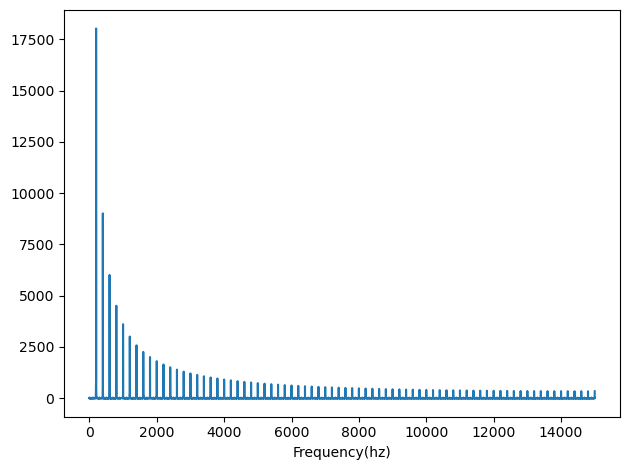

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = "Frequency(hz)")

По графику ниже можно увидеть, что "пила" спадает не так быстро, как "треугольник", но быстрее, чем "квадрат". Также пилообразный сигнал, в отличие от других, содержит как четные, так и нечетные гармоники. У пилообразного сигнала амплитуда гармоник уменьшается пропорционально обатной частоте, а у треугольного сигнала - обратной квадрату частоты

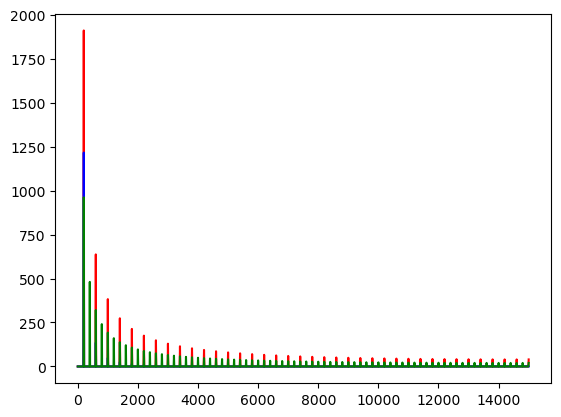

In [6]:
square = SquareSignal(200).make_wave(duration = 0.1, framerate = 30000)
square.make_spectrum().plot(color = "red")
triangle = TriangleSignal(200).make_wave(duration = 0.1, framerate = 30000)
triangle.make_spectrum().plot(color = "blue")
sawtooth = SawtoothSignal(200).make_wave(duration = 0.1, framerate = 30000)
sawtooth.make_spectrum().plot(color = "green")

# Упражнение 2.3

Создадим прямоугольный сигнал 1100 Гц и построим его спектр

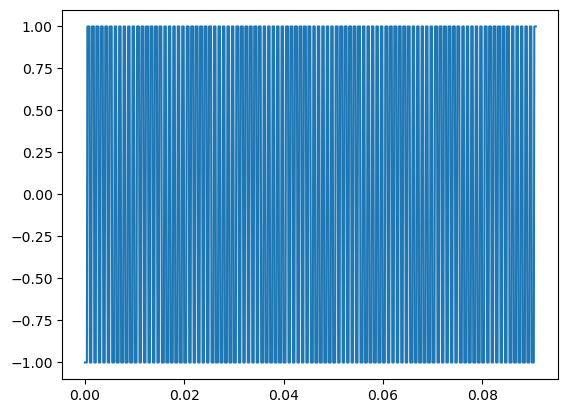

In [7]:
from thinkdsp import SquareSignal
signal = SquareSignal(1100)
duration = signal.period * 100
segment = signal.make_wave(duration, framerate = 10000)
segment.plot()

In [10]:
wave = signal.make_wave(duration = 2, framerate = 10000)
wave.apodize()
wave.make_audio()

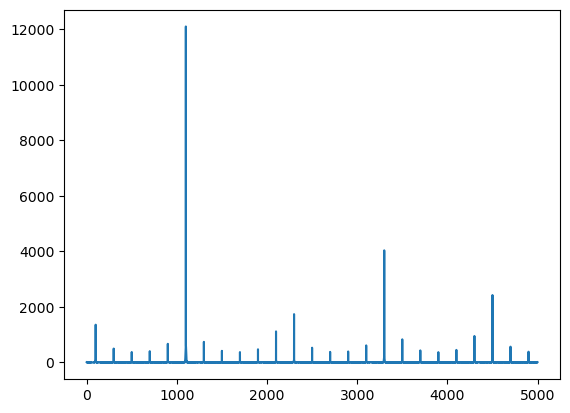

In [11]:
spectrum = wave.make_spectrum()
spectrum.plot()

Во время прослушивания чувствуется биение (из-за того, что большинство гармоник были завернуты)

# Упражнение 2.4

Создадим треугольный сигнал с частотой 440 гц длительностью 0.01 с 

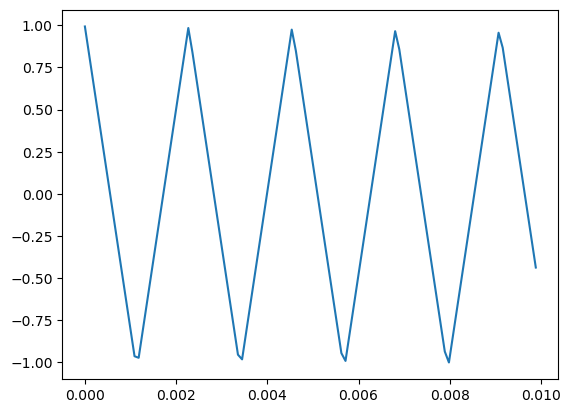

In [12]:
from thinkdsp import TriangleSignal
triangle = TriangleSignal(440).make_wave(duration = 0.01)
triangle.plot()

Послушаем его

In [14]:
wave = signal.make_wave(duration = 2, framerate = 10000)
wave.apodize()
wave.make_audio()

hs - амплитуда и фаза, fs - массив, содержащий частоты, соответствующие hs 

array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 4.9990e+03, 4.9995e+03,
       5.0000e+03])

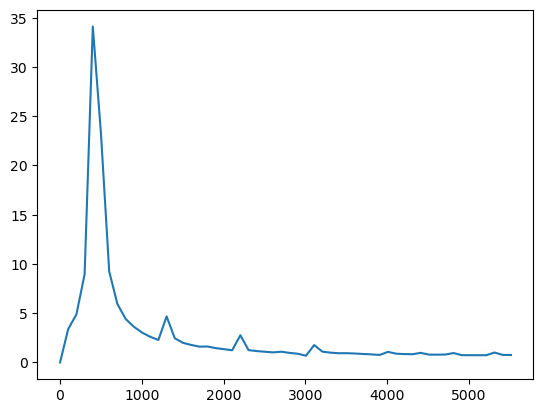

In [15]:
import numpy as np
hs = np.fft.rfft(wave.ys)
spectrum = triangle.make_spectrum()
spectrum.plot()
n = len(wave.ys)
d = 1 / wave.framerate
fs = np.fft.rfftfreq(n, d)
fs

In [16]:
hs

array([ 8.        +0.j        , -2.90040323+2.83523093j,
       -2.18940116+0.4907247j , ..., -2.18959238-0.48983992j,
       -2.90045222-2.83488363j,  8.        +0.j        ])

Установим hs[0] = 100, увидим, что высота графика увеличилась

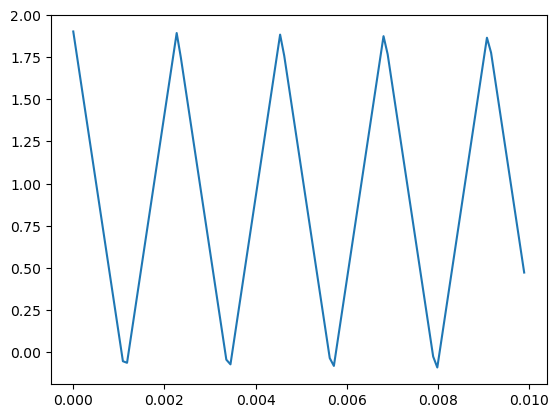

In [17]:
spectrum.hs[0] = 100
spectrum.make_wave().plot()

# Упражнение 2.5

Напишем функцию в соответствии с заданием:

In [18]:
def filter_spectrum(spectrum):
  spectrum.hs[1:] /= spectrum.fs[1:]
  spectrum.hs[0] = 0

Послушаем прямоугольный сигнал до применения функции

In [20]:
wave = SquareSignal(440).make_wave(duration = 1)
wave.make_audio()

Построим спектр до применения функции:

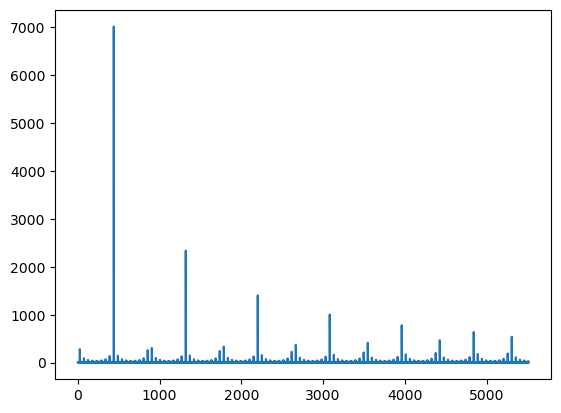

In [21]:
sp5 = wave.make_spectrum()
sp5.plot()

И после:

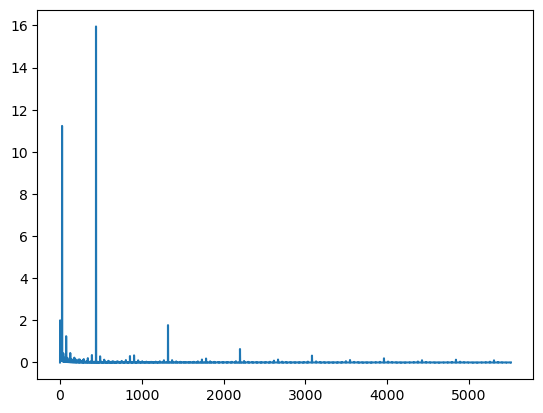

In [22]:
filter_spectrum(sp5)
sp5.plot()

Послушаем новую запись:

In [24]:
after_filter = sp5.make_wave()
after_filter.make_audio()

Звук стал более приглушенным

# Упражнение 2.6

Для анализа возьмем пилообразный сигнал, так как он содержит все гармоники

In [26]:
sig6 = SawtoothSignal(440)
wave = sig6.make_wave(duration = 2, framerate = 30000)
wave.make_audio()

Вычислим спектр:

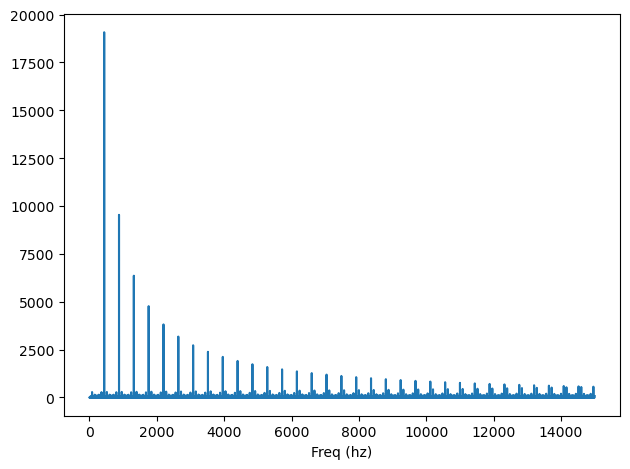

In [27]:
spectrum6 = wave.make_spectrum()
spectrum6.plot()
decorate(xlabel = "Freq (hz)")

Теперь сделаем так, чтобы гармоники уменьшались пропорционально 1/f^2:

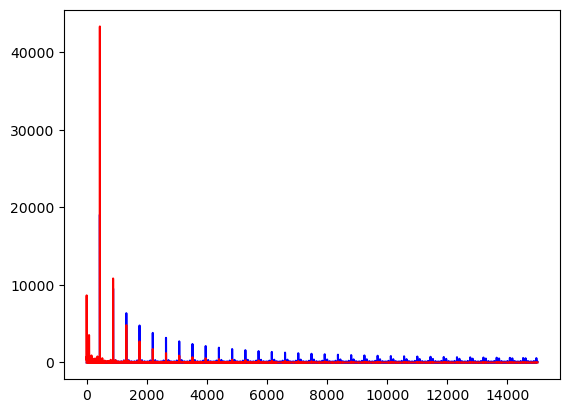

In [28]:
spectrum6.plot(color = "blue")
spectrum6.scale(1000)
filter_spectrum(spectrum6)
spectrum6.plot(color = "red")

Послушаем сигнал после изменений

In [29]:
wave6 = spectrum6.make_wave()
wave.make_audio()

# Конспект: свойства преобразования Фурье

Теорема о свертке утверждает, что преобразование Фурье от свертки двух функций является произведением их Фурье образов. Как следствие, свертку двух функций можно вычислить путем обратного преобразования Фурье. Когда свертку не удается получить аналитически, использование теоремы позволяет вместо численного интегрирования воспользоваться алгоритмом быстрого преобразования Фурье и существенно ускорить процесс вычислений.

Сдвиг исходного сигнала во времени на некоторый интервал t приводит к тому, что спектр задержанного сигнала оказывается равен спектральной плотности, умноженной на комплексную экспоненту. 